# Neural network to classify hand written digits using the mnist dataset

In [124]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms, datasets
import torch.functional as F
import torch.optim as optim

In [9]:
# prepering the data
t = transforms.Compose([
    transforms.ToTensor()
])
traning = datasets.MNIST("", train=True, download=True,transform= t)

t = transforms.Compose([
    transforms.ToTensor()
])
testing = datasets.MNIST("", train=False, download=True,transform= t)

In [10]:
train_set = torch.utils.data.DataLoader(dataset=traning, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(dataset=testing, batch_size=10, shuffle=True)


In [100]:
listdata = np.zeros(10)
for data in train_set:
    _, Y = data
    for y in Y:
        listdata[int(y)] += 1
        
listdata

array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
       5949.])

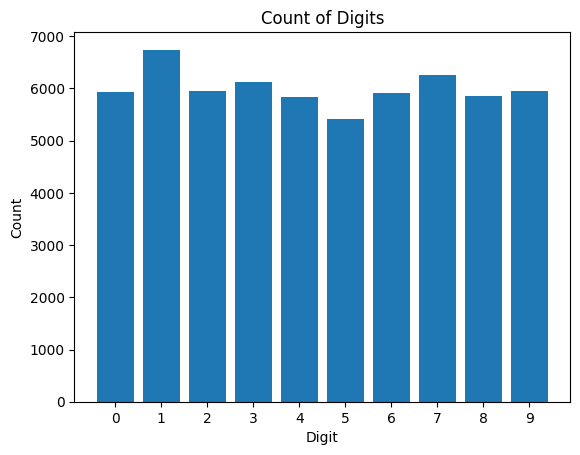

In [104]:
plt.bar(range(len(listdata)), listdata)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Count of Digits')
plt.xticks(range(len(listdata)), range(10))  # Add x-axis labels from 0 to 9
plt.show()

# Making the network

In [122]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 88)
        self.a1 = nn.ReLU()
        self.fc2 = nn.Linear(88, 55)
        self.a2 = nn.ReLU()
        self.fc3 = nn.Linear(55, 10)
        self.a3 = nn.LogSoftmax()
        
    def forward(self, input):
        x = self.fc1(input)
        x = self.a1(x)
        x = self.fc2(x)
        x = self.a2(x)
        x = self.fc3(x)
        x = self.a3(x)
        
        return x
        

In [123]:
model = Network()
model(torch.rand(28,28).view([-1, 28*28]))

C:\Users\Moha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[-2.2598, -2.4276, -2.2189, -2.4337, -2.4397, -2.3416, -2.4059, -2.1218,
         -2.1426, -2.3005]], grad_fn=<LogSoftmaxBackward0>)

## traning the model

In [130]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
crition = nn.NLLLoss()
EPOCHS = 4




In [132]:
# define traning loop

for e in range(EPOCHS):
    for data in train_set:
        X, y = data
        model.zero_grad()
        out = model(X.view([-1, 28*28]))
        
        loss = crition(out, y)
        loss.backward()
        optimizer.step()
    print(loss)


C:\Users\Moha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(0.2110, grad_fn=<NllLossBackward0>)
tensor(0.0377, grad_fn=<NllLossBackward0>)
tensor(0.0945, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)


In [135]:
torch.save(model.state_dict(), "C:\Projects\python\mnist\model\mymodel.pt")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Moha\AppData\Local\Temp\ipykernel_13544\2670056552.py:1: SyntaxWarning: invalid escape sequence '\P'
  torch.save(model.state_dict(), "C:\Projects\python\mnist\model\mymodel.pt")


In [137]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_set:
        X, y = data
        
        out = model(X.view(-1, 28*28))
        for idx, i in enumerate(out):
            if(torch.argmax(i) == y[idx]):
                correct += 1 
            total += 1
            
            
print("Accuricy = ", round(correct/total))

Accuricy =  1


tensor(4)
tensor(4)


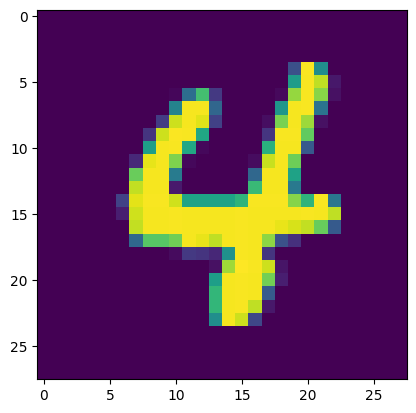

In [218]:
for data in test_set:
    x, y = data
    plt.imshow(x[0][0])
    o = model(x.view(-1, 28*28))
    print(torch.argmax(o[0]))
    print(y[0])
    break